Objective:
    
    1. 사진의 주인공을 다른 것과 바꿔라 (semantic segmentation)
        ex) 고양이
    2. 배경사진 바꿔보기
    3. 사진 속 문제점을 찾아 사진에 표시해 주피터 노트북에 포함하여 제출하기
    3-1. 해결 방법을 제안해 보기
        - 생각해 볼 만한 주제를 아래에 몇 가지 제시하기
        - 사진의 문제점을 해결할 방안을 정리하여 제안하기
(선택한 기술이 DeepLab 모델의 Semantic Segmentation 이 만들어 낸 Mask 영역에 어떻게 적용되어 문제점을 보완하게 되는지의 메커니즘이 포함된 솔루션이어야 합니다.)

In [349]:
import os
import urllib # 웹에서 데이터를 다운로드할 때 사용
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation # 시맨틱 세그멘테이션을 사용하기 위한 라이브러리
from matplotlib import pyplot as plt

(2217, 3352, 3)


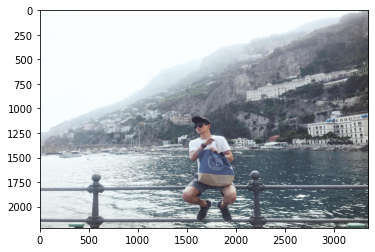

In [350]:
Napoli = os.getenv('HOME')+'/aiffel/human_segmentation/images/Napoli.jpg'
img_orig = cv2.imread(Napoli)

# Reminder
# 사진을 os.getenv('') + ' / / /' 출처로 가져오고 지정변수에 저장해준다
# cv2.imread(사진출처가 담긴 변수)는 사진을 읽어주고 이 기능을 지정 변수에 저장해준다

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)) # BGR2RGB
plt.show()

(2217, 3552, 3)


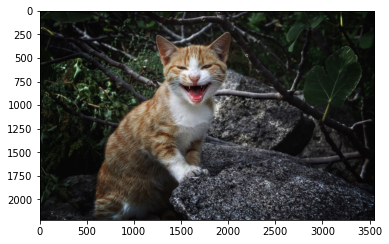

In [351]:
Cat = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat.jpg'
cat_img = cv2.imread(Cat)

print(cat_img.shape) # (___.img.shape) 은 사진을 출력해준다
plt.imshow(cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB)) 
plt.show()

(1000, 1920, 3)


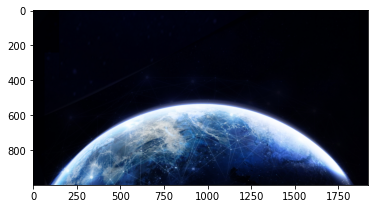

In [352]:
Space = os.getenv('HOME')+'/aiffel/human_segmentation/images/space.jpg'
space_img = cv2.imread(Space)

print(space_img.shape) 
plt.imshow(cv2.cvtColor(space_img, cv2.COLOR_BGR2RGB)) 
plt.show()

# 셸로우 포커스 만들기 
__________________________________________
# (2) 세그멘테이션으로 사람 분리하기
# (3) 시멘틱 세그멘테이션 다뤄보기

웹에서 모델 가져오기
_________________


In [353]:
# PixelLib에서 제공해 주는 모델을 다운받기

# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
# 깃허브 웹에서 파일을 가져오는거기 때문에 해당 url를 작성한다


# 다운로드하기
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f70cc77b820>)

그다음 다운로드한 모델을 이용해 PixelLib로 우리가 사용할 세그멘테이션 모델을 생성합니다.

https://github.com/ayoolaolafenwa/PixelLib

mask r-cnn < pointrend
sematic segmentation, instance segmentation
!? [PointRend Instance Segmentation] Records


segmatic_segmentation 로 각 사진 segment 해주기
_______________

In [354]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [355]:
segvalues, output = model.segmentAsPascalvoc(Napoli) # 인물을 사진으로 부터 분리시켜 주는 함수인 듯 하다
# segvalues에는 class_ids와 masks가 있다
#class_ids로 어떤 물체가 있는지 확인할 수 있따
# segmentAsPascalvoc 함수로 데이터로 학습된 모델을 이용

In [356]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

# background 제외 20개의 라벨이 존재

len(LABEL_NAMES)

21

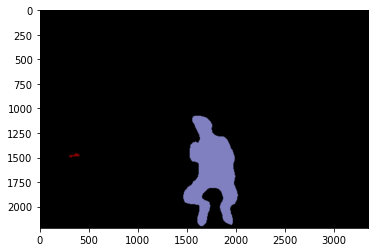

In [357]:
plt.imshow(output) #모델에서 나온 출력값을 살펴보기
plt.show()

segmentation 이 너무 잘 된 것 같은데 어쩌지......잘 안 되는 사진으로 바꿔야 되는 것인가......?

In [358]:
segvalues

{'class_ids': array([ 0,  4, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [359]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id]) # class_id로 통해 어떤 물체가 있는 지 확인 할 수 있다

background
boat
person


배경, 배, 사람을 분류했다

이제 물체마다 output에 어떤 색상으로 나타나 있는 지 알아내보자

In [360]:
# PixelLib에서 가져온 코드라고 한다
# 아래 코드를 바로 이해하지 않아도 된다고 한다
# 색상 코드 결과물이다

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

인덱스[15] 사람에 형태에 나오는 색상을 살펴보자

In [361]:
colormap[15] # (인덱스 15번) 사람을 나타내는 색 알아보기

array([192, 128, 128])

# 인덱스 번호에 따라 해당 클라스 아이디를 살펴볼 수 있다

--> 사람 외 다른 물체를 찾고 싶다면 colormap[class_id]
    예) 고양이는 colormap[8]
_______________

주의할 점: output은 BGR 순서이다! 하지만 colormap은 RGB순!

--> 따라서 색상 값의 순서를 바꿔 줄 필요가 있다

RGB to BGR 처리해주자

In [362]:
seg_color = (128,128,192) # 192 와 129의 순서 혹은 위치를 해당 색상 (R or G or B)에 적어주자

(2217, 3352)


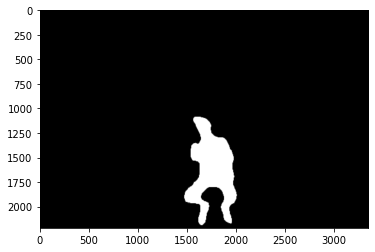

In [363]:
# 색상 순서를 잘 바꿨는 지 확인하기
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray') # cmap를 흑백으로 바꿔준다
plt.show()

 # image 를 grayscale 로 바꿔주는 이유
 
(워터쉐드 세그멘테이션 watershed segmentation) grayscale로 변환하면 0~255의 픽셀 값으로 위치의 높고 낮음을 구분하여 경계선을 구분한다.
 


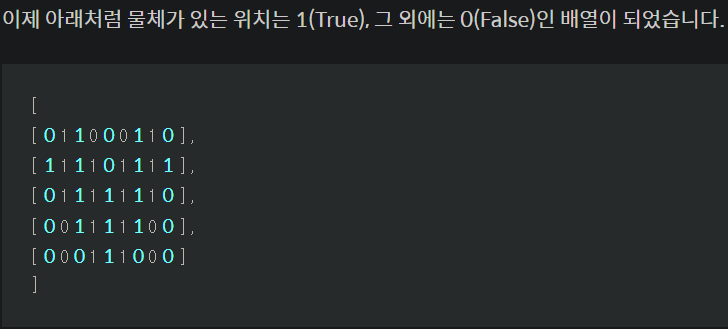

채널 정보가 사라졌다.
물체가 있는 위치는 1(True), 없는 위치는 0(False)인 배열로 변했다

# 이미지 합치기

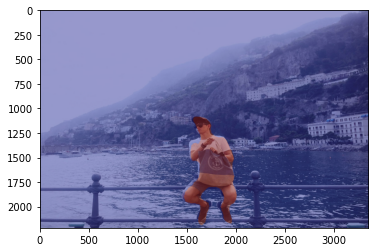

In [364]:
# 세그멘테이션이 얼마나 잘 되었는 지 확인하기 위해 원래 이미지와 겹쳐본다

img_show = img_orig.copy() # 이미지 원본을 복사하기

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스크를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)) # BGR2RGB
plt.show()

# 셸로우 포커스 만들기 (4) 배경 흐리게 하기

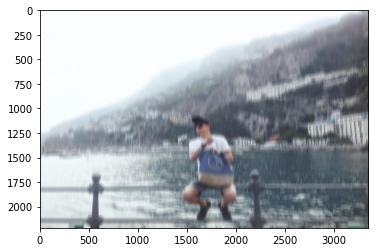

In [365]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요

img_orig_blur = cv2.blur(img_orig, (1, 50)) 
# 1, 1이 가장 선명하고 높아질 수록 흐려진다. 
# 올릴 수 있는 한계는 무한인 것 같다. 하지만 이미 255, 255에서 아무것도 안보인다

# 특이점: 입력값으로 들어가는 두 변수가 떤 값을 의미하는 지 모르겠다

# --> 검색해보니 cv2.blur는 평균 블러링(Average Blurring)이라고 그냥 모든 값을 평균을 내서 전체적으로 blur 처리해주는 함수 같다

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출하기

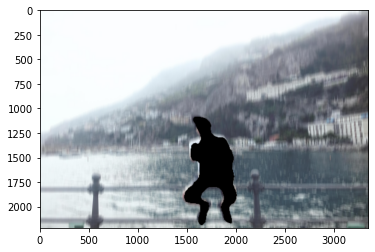

In [366]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR) # 채널을 흑백에서 BGR로 변경
img_bg_mask = cv2.bitwise_not(img_mask_color) 
# bitwise_not 함수는 이미지를 반전시켜준다
# 원래 마스크에서는 배경이 0, 사람이 255였고 이를 반대로 바꿔준다

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
# 반전된 세그멘테이션 결과를 이용해서 이미지와 bitwise_and 연산을 수행하면 
# !!! 배경만 있는 영상을 얻을 수 있다
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 된다

plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 셸로우 포커스 만들기 (5) 흐린 배경과 원본 영상 합성

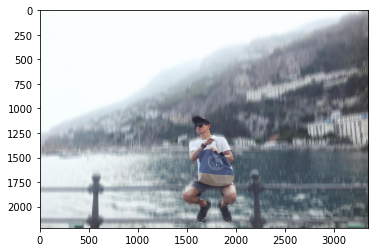

In [367]:
# 배경 영상과 사람 영상을 합친다

img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# 255인 부분만 원본 이미지 값을 가지고 오고 아닌 영역은 블러된 이미지 값을 사용
# np.where(조건, 참일때, 거짓일때)
# numpy.where - https://numpy.org/doc/stable/reference/generated/numpy.where.html

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [368]:
# 배경만 흐릿해진 경우를 볼 수 있다



고양이 사진으로부터 고양이를 세그멘트 해보자

1. PixelLib 모델을 불러와 semantic segmentation 처리
    - Pascal Voc 이란 20개의 피쳐로 이미 학습된 모델이다 --> 이로 인해 사진 속 이미지 분류를 해준다

In [369]:
segvalues, output = model.segmentAsPascalvoc(Cat)

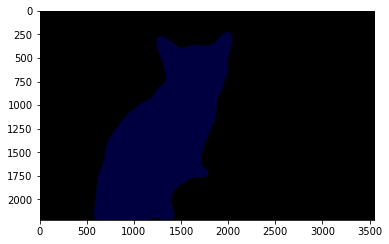

In [370]:
plt.imshow(output)
plt.show()

고양이 사진은 세그멘테이션이 조금 허술하게 된 것 같다. 손 부분이 잘려서 나온 듯 하다.

In [371]:
segvalues

{'class_ids': array([0, 8]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [372]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id]) # 세그멘테이션 각 분류의 ID를 출력해주기

background
cat


배경과 고양이 ; 분류는 제대로 한 것 같다

이제 색상을 확인해보자

In [373]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [374]:
colormap[8] # 고양이는 인덱스 8번이기에 8을 입력해준다

array([64,  0,  0])

# 문제 발생 : 
처음에 고양이 분리가 아예 안됐다. plt.show()로 출력했을때 쌔까만 배경만 나왔고 고양이 형태를 찾아볼 수 없었다. 

따라서 고양이가 사진으로 부터 분리가 안됐다

해결 방법 및 문제 원인:
cv는 기본 bgr이기 때문에 rgb로 바꿔줘야 되는데 그걸 안했다. 아래 코드로 변환을 시켜주니 그 뒤로 문제가 해결이 됐다.


In [375]:
seg_color = (0,0,64)

(2217, 3552)


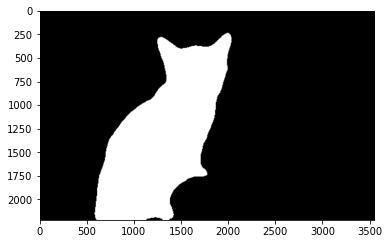

In [376]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

In [387]:
from PIL import Image

img = Image.open(Napoli)

img_resize = img.resize((3352, 2217))
img_resize.save(Napoli)

img_resize_lanczos = img.resize((3352, 2217), Image.LANCZOS)

img_resize_lanczos.save(Napoli)

In [391]:
image_segmentation = model.segmentAsPascalvoc(image())

img_seg_cat = image_segmentation(cat_img, 8, cat_img)

AttributeError: 'list' object has no attribute 'read'

# 문제 발생:
고양이가 안나온다......분리가 제대로 안 된 것인가?

해결: 위에 해결방법 적음

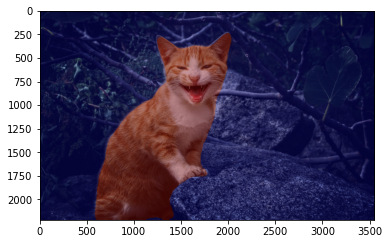

In [379]:
img_show = cat_img.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

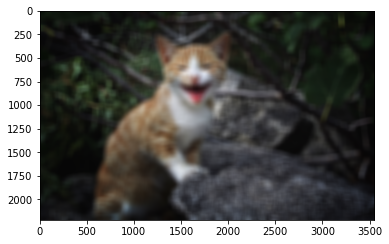

In [380]:
cat_img_blur = cv2.blur(cat_img, (70,70))  
plt.imshow(cv2.cvtColor(cat_img_blur, cv2.COLOR_BGR2RGB))
plt.show()

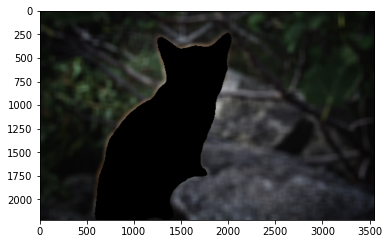

In [381]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(cat_img_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 궁금증 : 
# 여기서 배경만 따로 뽑아와서 따로 사용할 수 는 없나?
# 배경만 빼오면 고양이 형태는 그대로 남나?
# 분리한 고양이를 따로 끌고와서 처리하려면 어떻게 해야 되나?


이미지 합치기
___________

In [385]:
img_concat = np.where(img_mask_color==255, img_orig, cat_img)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

ValueError: operands could not be broadcast together with shapes (2217,3552,3) (2217,3352,3) (2217,3552,3) 

# Background Editing in Images

1. create a virtual background for an image #배경 생성

2. assign a distinct color to the background of an image # 배경색에 특정 색을 지정해주기

3. blur the background of an image # 배경 블러 처리 해주기

4. grayscale the background of an image and a video # 그레이스케일로 변환

In [ ]:
import pixellib
from pixellib.tune_bg import alter_bg
import tensorflow as tf

In [ ]:
change_bg = alter_bg(model_type = "pb")
change_bg.load_pascalvoc_model(model_file)
change_bg.blur_bg("cat.jpg", extreme = True, detect = "cat", output_image_name="blur_img.jpg")

In [ ]:
change_bg = alter_bg() # change_bg 클래스를 임포트하고 그에 대한 인스턴스를 생성

In [ ]:
change_bg.load_pascalvoc_model(model_file)
                            # deeplabv3_xception_tf_dim_ordering_tf_kernels 가 지정 되어 있는 변수명
change_bg.change_bg_img(f_image_path = "Napoli.jpg",b_image_path = "space.jpg", output_image_name="final.jpg")
# f_image_path 는 배경이 바뀔 사진이다
# b_image_path 는 배경을 바꾸는데 사용할 이미지이다
# output_image_name 은 최종 결과물이다                      